# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## EDA<a id='3.1_Contents'></a>

## 3.2 Introduction<a id='3.2_Introduction'></a>

In this project, I aim to support a broader business goal—modeling ski-resort revenue—by predicting adult weekend ticket prices. I cleaned and prepared the data by handling missing ticket-price values (dropping affected rows), reconciling two ticket-price fields, removing one unusable column, correcting a data error, and tidying other features. I then augmented the dataset with U.S. state population and land-area data, followed by additional cleaning. With the problem clearly defined and the dataset validated, my specific data-science task is to build a model that predicts adult weekend ticket prices for ski resorts.

## 3.3 Imports<a id='3.3_Imports'></a>

In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Ski data<a id='3.4.1_Ski_data'></a>

In [67]:
ski_data = pd.read_csv('../data/ski_data_cleaned.csv')

In [68]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

In [69]:
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,quad,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,2,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,2,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [70]:
state_summary = pd.read_csv('../data/state_summary.csv')

In [71]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   state                        35 non-null     object 
 1   resorts_per_state            35 non-null     int64  
 2   state_total_skiable_area_ac  35 non-null     float64
 3   state_total_days_open        35 non-null     float64
 4   state_total_terrain_parks    35 non-null     float64
 5   state_total_nightskiing_ac   35 non-null     float64
 6   state_population             35 non-null     int64  
 7   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 2.3+ KB


In [72]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

In [73]:
state_summary_newind = state_summary.set_index('state')

#### 3.5.1.1 Total state area<a id='3.5.1.1_Total_state_area'></a>

In [74]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

home state, Montana, comes in at third largest.

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>

In [76]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states. Thus your state is less densely populated.

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>

In [77]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>

In [78]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>

In [79]:
state_summary_newind.state_total_nightskiing_ac.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ac, dtype: float64

From my EDA, New York dominates total night-skiing terrain, and the rest of the top five are northern states. This raises two testable hypotheses: (1) night skiing is a standalone customer draw, and/or (2) resorts use it to extend short winter days and attract nearby, short-trip visitors. The data is generating good follow-up questions. Next, I’ll ask my sponsor/data provider for resort-level fields such as typical length of stay and granular demand metrics—e.g., counts of day tickets versus weekly passes—while noting this may be highly granular and proprietary.

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>

In [80]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

The total days open seem to bear some resemblance to the number of resorts. This is plausible. The season will only be so long, and so the more resorts open through the skiing season, the more total days open we'll see. New Hampshire makes a good effort at making it into the top five, for a small state that didn't make it into the top five of resorts per state. Does its location mean resorts there have a longer season and so stay open longer, despite there being fewer of them?

### 3.5.2 Resort density<a id='3.5.2_Resort_density'></a>

From my EDA, big states aren’t always the most populous, states with many resorts don’t always have the largest total ski area, and New York uniquely leads in resort count and night-skiing despite not being top-5 by land area (though it’s #2 by population). This suggests demand-driven supply and possible price competition within NY. For modeling ticket prices, I’ll replace absolute population/area with density ratios and drop the raw columns. Key engineered features: resorts per 1M residents, skiable acreage per 1M residents, night-ski acreage per 1M residents, resorts per 1,000 sq mi, and skiable acreage per 1,000 sq mi. Next, I’ll test whether higher resort density correlates with lower prices and assess state-level effects.

In [81]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


By removing the two columns that only captured raw state size and population, I refocused the dataset on competitive landscape metrics. The working DataFrame now tracks each state’s resort count, total skiable area, and ski-days. I’ve translated plain state stats into density-based features—resorts and skiable acreage relative to population and land area—so the model reflects market intensity rather than absolute size.

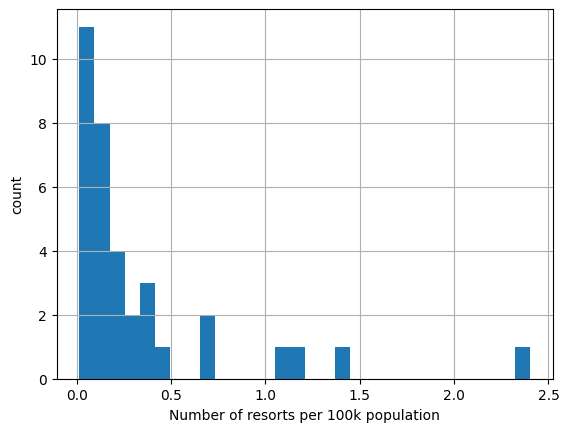

In [82]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

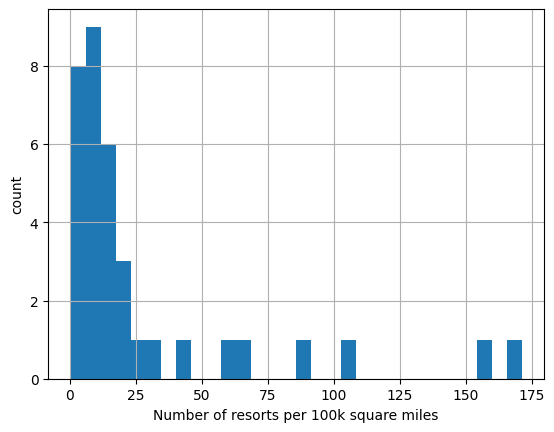

In [83]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>

In [84]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [85]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

Vermont seems particularly high in terms of resorts per capita, and both New Hampshire and Vermont top the chart for resorts per area. New York doesn't appear in either!

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

After engineering density-based state features, I’m seeing substantial cross-correlations and mixed scales. To untangle this and capture the main structure, I’ll run [principle components analysis](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA) (PCA): standardize the features, compute orthogonal components, and keep the top ones ranked by explained variance (e.g., PC1–PC2 for visualization, more for modeling). I’ll inspect component loadings to see which original variables drive each component. This reduces multicollinearity, gives a lower-dimensional view of the competitive landscape, and preserves most of the signal for downstream price prediction.


The basic steps in this process are:

1. scale the data (important here because our features are heterogenous)
2. fit the PCA transformation (learn the transformation from the data)
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

For PCA, I restrict the feature matrix to numeric columns only. To keep track of each state without feeding it into the analysis, I set state as the DataFrame index. This preserves the label for plotting and joins while ensuring PCA sees only numeric data.

In [87]:
#Create a new dataframe, `state_summary_scale` from `state_summary` whilst setting the index to 'state'
state_summary_scale = state_summary.set_index('state')

#Save the state labels (using the index attribute of `state_summary_scale`) into the variable 'state_summary_index'
state_summary_index = state_summary_scale.index

#Save the column names (using the `columns` attribute) of `state_summary_scale` into the variable 'state_summary_columns'
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,
Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


The above shows what we expect: the columns we want are all numeric and the state has been moved to the index. Although, it's not necessary to step through the sequence so laboriously, it is often good practice even for experienced professionals. It's easy to make a mistake or forget a step, or the data may have been holding out a surprise! Stepping through like this helps  validate both your work and the data!

Now use `scale()` to scale the data.

In [88]:
state_summary_scale = scale(state_summary_scale)

In [89]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


##### 3.5.3.1.1 Verifying the scaling<a id='3.5.3.1.1_Verifying_the_scaling'></a>

This is definitely going the extra mile for validating your steps, but provides a worthwhile lesson.

First of all, check the mean of the scaled features using panda's `mean()` DataFrame method.

In [90]:
#Call `state_summary_scaled_df`'s `mean()` method
state_summary_scaled_df.mean()

resorts_per_state             -7.295751e-17
state_total_skiable_area_ac   -4.163336e-17
state_total_days_open          7.692260e-17
state_total_terrain_parks      4.599495e-17
state_total_nightskiing_ac     7.612958e-17
resorts_per_100kcapita         5.075305e-17
resorts_per_100ksq_mile        5.075305e-17
dtype: float64

This is pretty much zero!

Perform a similar check for the standard deviation using pandas's `std()` DataFrame method.

In [91]:
#Call `state_summary_scaled_df`'s `std()` method
state_summary_scaled_df.std()

resorts_per_state              1.014599
state_total_skiable_area_ac    1.014599
state_total_days_open          1.014599
state_total_terrain_parks      1.014599
state_total_nightskiing_ac     1.014599
resorts_per_100kcapita         1.014599
resorts_per_100ksq_mile        1.014599
dtype: float64

During scaling, I validated that features should have mean ≈ 0 and std ≈ 1. My check showed std values not exactly 1—until I realized I was mixing estimators: sklearn’s scale() uses the population standard deviation (ddof=0), while pandas/NumPy std() defaults to the sample estimator (ddof=1). Recomputing with std(ddof=0) (or using StandardScaler(with_std=True)) brings the post-scale stds back to ~1. Takeaway: align degrees of freedom across tools when verifying scaling.

In [92]:
#Repeat the previous call to `std()` 
#but pass in ddof=0 
state_summary_scaled_df.std(ddof=0)

resorts_per_state              1.0
state_total_skiable_area_ac    1.0
state_total_days_open          1.0
state_total_terrain_parks      1.0
state_total_nightskiing_ac     1.0
resorts_per_100kcapita         1.0
resorts_per_100ksq_mile        1.0
dtype: float64

## 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [93]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

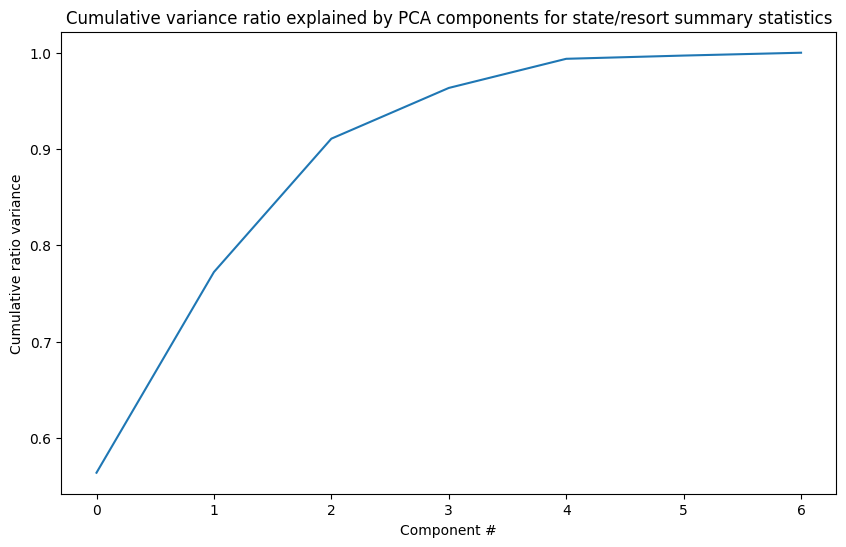

In [94]:
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', 
#the ylabel to 'Cumulative ratio variance', 
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'

plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component #')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

During EDA, I optimize for speed over polish. I create simple, readable plots with clear titles, axis labels, and units, and I jot 1–2 line takeaways in markdown right next to each figure. This way, when I return to summarize results, I can quickly retrace insights without rebuilding visuals.

Apply the transformation to the data to obtain the derived features.

In [95]:
#Call `state_pca`'s `transform()` method, 
#passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [97]:
state_pca_x.shape 

(35, 7)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

I visualize the competitive landscape by plotting the first two PCA components. I take PC1 and PC2 from `state_pca_x` as the x/y coordinates, keep the saved `state` labels to annotate each point, and compute the cumulative variance explained by the first two components `(cum_var[1])`. Then I produce a clean scatterplot (proper size, titled with the % variance, labeled axes “PC1” and “PC2”) so the plot clearly shows structure while indicating how much variance the two components capture.

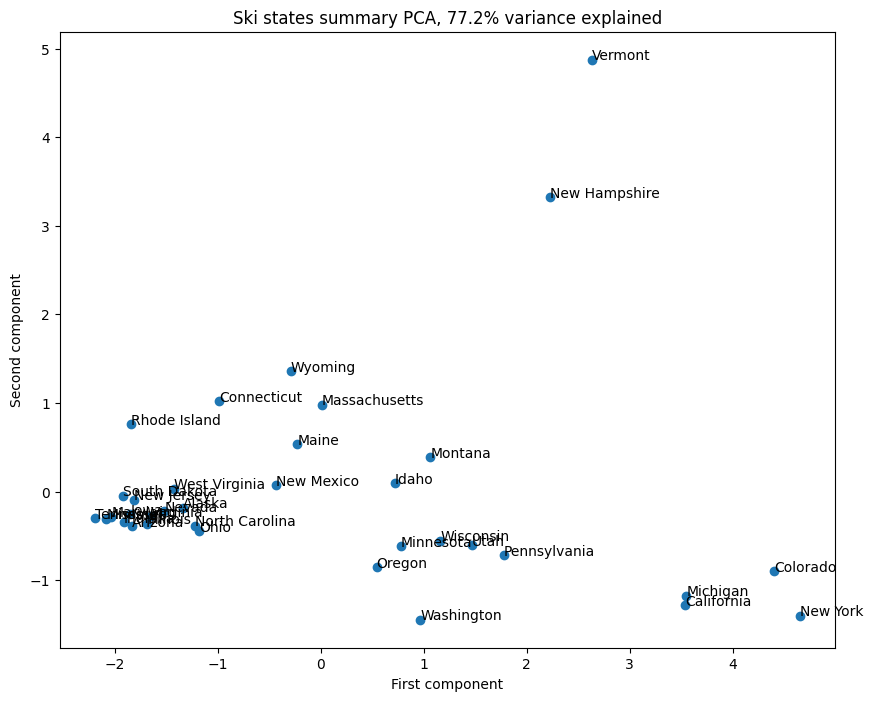

In [99]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

So far, every state point looks the same; the plot shows relationships from supply/density features, but my target is ticket price. Next, I’ll encode price on the PC1–PC2 scatter:

* Color each state by its median adult weekend ticket price (add a colorbar).

* Optionally scale marker size by # of resorts or price dispersion (IQR).

* Inspect gradients/clusters; then quantify with a quick regression price ~ PC1 + PC2 and Spearman/Pearson correlations.

In [100]:
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

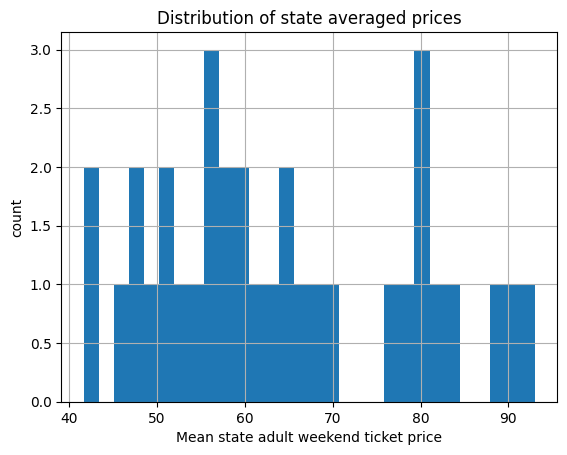

In [101]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

I now have several separate objects (PC1/PC2 arrays, state labels, and per-state ticket prices). To make this manageable and reproducible, I’ll build a single tidy DataFrame keyed by state that combines everything needed for the plot:

* `pc1`,`pc2` from the PCA transform

* avg_weekend_price (adult) computed per state

* optional context like `num_resorts` or `price_iqr`

With this unified table, I can cleanly create the PC1–PC2 scatter, color points by avg_weekend_price, annotate with state labels, and reuse the same table for downstream analysis.

In [102]:
#Create a dataframe containing the values of the first two PCA components
#first component was given by state_pca_x[:, 0],
#second by state_pca_x[:, 1]
#Call 'PC1' and 'PC2', set the dataframe index to `state_summary_index`
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index = state_summary_index )
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.336533,-0.182208
Arizona,-1.839049,-0.387959
California,3.537857,-1.282509
Colorado,4.402210,-0.898855
Connecticut,-0.988027,1.020218


That worked, and you have state as an index.

In [103]:
# the average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [104]:
# also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


Now I can concatenate both parts on axis 1 and using the indexes.

In [105]:
#Use pd.concat to concatenate `pca_df` and `state_avg_price` along axis 1

pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.336533,-0.182208,57.333333
Arizona,-1.839049,-0.387959,83.500000
California,3.537857,-1.282509,81.416667
Colorado,4.402210,-0.898855,90.714286
Connecticut,-0.988027,1.020218,56.800000


The average ticket-price histogram shows spread, but using raw values for marker size is hard to read. I’ll add a discrete price_quartile column by binning each state’s avg weekend price into four quartiles (Q1–Q4). I’ll then map Q1→small points and Q4→large points on the PC1–PC2 scatter (with color still showing price), making tier differences pop without noisy scale effects.

In [106]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.336533,-0.182208,57.333333,"(53.1, 60.4]"
Arizona,-1.839049,-0.387959,83.500000,"(78.4, 93.0]"
California,3.537857,-1.282509,81.416667,"(78.4, 93.0]"
Colorado,4.402210,-0.898855,90.714286,"(78.4, 93.0]"
Connecticut,-0.988027,1.020218,56.800000,"(53.1, 60.4]"


In [107]:
# Note that Quartile is a new data type: category
# This will affect how we handle it later on
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

I just built a new, plot-ready DataFrame by merging PCA outputs with per-state pricing. Before using it, I run a null audit: list any rows where pc1, pc2, avg_weekend_price (and any extras like num_resorts/price_iqr) contain NaN. I expect an empty result. If anything appears, I’ll debug join keys and coverage (e.g., states without prices, type mismatches, or dropped states), then fix or document the treatment (correct join, recompute aggregates, or drop with justification).

In [109]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.843646,0.761339,NaN,NaN


Rhode Island shows up with a missing adult-weekend price because I built the state summary before dropping resorts that lacked prices—the state has only one resort and its price was missing. For price-driven modeling I can drop this state; but for cluster/landscape visuals I want to keep it visible.

What I do

* Keep RI in the PCA/state table but mark its price as missing.

* Since `price_quartile` is categorical, I first add a new level `"NA"` and set RI’s quartile to `"NA"`.

* Plots: color by price with a distinct “missing” legend entry; sizes/annotations still render so RI appears in context.

* Modeling path: exclude rows with missing target or impute only if justified; document the choice.

In [110]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

C:\Users\oouje\AppData\Local\Temp\ipykernel_9872\2495745839.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
C:\Users\oouje\AppData\Local\Temp\ipykernel_9872\2495745839.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

PC1             -1.843646
PC2              0.761339
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

I explicitly set price_quartile to include an “NA” category for states without a known ticket price. This string category is not the same as NumPy’s NaN; it behaves like a labeled level and will appear in the legend.

Plot plan

* Color points by price_quartile (Q1–Q4 plus NA as a distinct legend entry).

* Size points by avg_weekend_price (e.g., normalized radius); for NA price, use a small, fixed size.

* Keep axes as PC1 and PC2, title with % variance explained, and annotate with state labels.

To make the PCA map readable, I plot one scatter per price quartile. Iterating over quartiles yields a clean legend (Q1–Q4 + NA), with color = quartile and marker size ∝ average weekend price (larger marker ⇒ higher price). Grouped plotting keeps categories distinct and communicates both tier and magnitude at a glance.

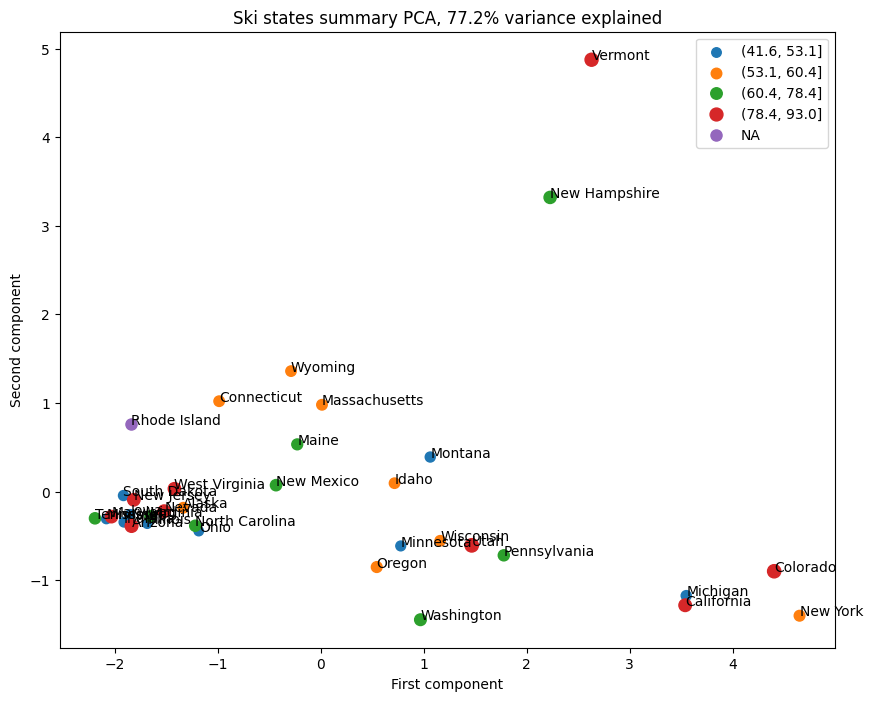

In [111]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(10,8))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

After overlaying average weekend price on the PC1–PC2 map, there’s no obvious pattern: highest-price (Q4) states appear on the left, right, and top, and the other quartiles are equally scattered. Since PC1+PC2 explain ~77% of variance in my engineered state features, this suggests those supply/density summaries don’t explain price at the state level.

The Matplotlib PC1–PC2 scatter worked, but it was tedious: I had to loop over quartiles to build the legend and keep color and size in a 1:1 mapping. If color and size encoded different signals, the setup would grow complex fast. For fast, exploratory visuals with multiple aesthetics, I prefer Seaborn—it maps `hue`, `size`, and even `style` with clear legends by default. After reshaping prices into a long format (melt to a single `price` column with a `ticket_type` label), Seaborn can draw separate weekend vs. weekday boxplots in one line. Matplotlib stays my choice for fine-grained control; Seaborn is my go-to for quick, information-dense EDA.

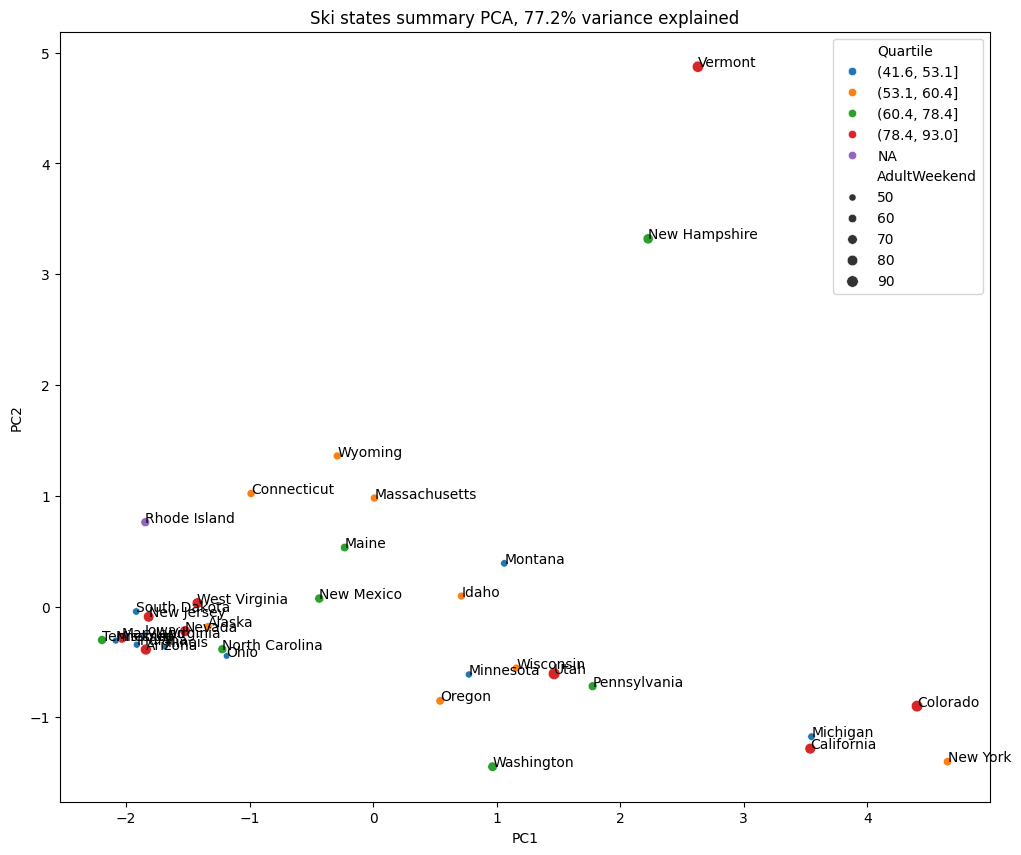

In [112]:
#Create a seaborn scatterplot
#Specify the dataframe pca_df as the source of the data,
#specify 'PC1' for x and 'PC2' for y,
#specify 'AdultWeekend' for the pointsize (scatterplot's `size` argument),
#specify 'Quartile' for `hue`
#specify pca_df.Quartile.cat.categories for `hue_order`

x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))

# Note the argument below to make sure we get the colours in the ascending
sns.scatterplot(x='PC1',y='PC2', size= 'AdultWeekend', hue= 'Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)

#still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

For multi-aesthetic EDA, I prefer Seaborn because it keeps the plot readable with minimal code. I can explicitly order legends (e.g., quartiles) using hue_order=['Q1','Q2','Q3','Q4','NA'], get separate, well-labeled legends for each aesthetic, and benefit from sensible size scaling (small → large) out of the box. Starting from a tidy DataFrame also reduces errors, so I first wrangle data into the right shape (e.g., melt prices into a single price column with categorical labels like ticket_type or price_quartile).
Key skill: reshape data to fit the question; then let Seaborn handle hue, size, and style cleanly.

Having gained a good visualization of the state summary data.

On the PC1–PC2 map, Vermont and New Hampshire sit higher on PC2 (about as “extreme” there as NY/CO are on PC1). To understand why, I read the loadings from the fitted PCA:

What I inspect: pca.components_ tells how strongly (and in which direction) each standardized feature contributes to each component. Because I standardized (zero mean, unit variance), coefficients are comparable.

How I read it: I convert components_ into a labeled DataFrame (index = PC1, PC2, …; columns = my feature names), then sort by abs(loading) for PC2 to find the top drivers and use the sign to interpret “higher vs. lower.”

Validation: Correlate PC2 with the original features and compare VT/NH feature values to confirm which densities (e.g., night-ski acreage per capita, resorts per land area, etc.) push them up.

Note: This interpretation is ideal for EDA. If PCA were only a preprocessing step in a ML pipeline, the coefficients are less about causality/explanation.

Outcome: Clear, labeled loadings show which engineered state-density features explain VT/NH’s position on PC2, and they let me annotate or narrate the scatter with evidence.

In [113]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0.486079,0.318224,0.489997,0.488420,0.334398,0.187154,0.192250
1,-0.085092,-0.142204,-0.045071,-0.041939,-0.351064,0.662458,0.637691
2,-0.177937,0.714835,0.115200,0.005509,-0.511255,0.220359,-0.366207
3,0.056163,-0.118347,-0.162625,-0.177072,0.438912,0.685417,-0.512443
4,-0.209186,0.573462,-0.250521,-0.388608,0.499801,-0.065077,0.399461
5,0.818390,0.092319,-0.238198,-0.448118,-0.246196,-0.058911,0.009146
6,-0.090273,-0.127021,0.773728,-0.613576,0.022185,-0.007887,-0.005631


For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [114]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ac,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [115]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ac,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

EDA and PCA show no clear state clusters tied to price, so I’ll build one pooled pricing model across all states rather than special-casing any single state. The feature set already captures relevant state context (density and per-capita measures), which is sufficient for my business use case.

Implications

* Proceed with a unified model; no bespoke state rules.

* Validate with cross-validation stratified by state and monitor residuals by state.

* If systematic state effects appear, escalate to fixed effects or a hierarchical (partial-pooling) model.

### 3.5.5_Ski_Resort_Numeric_Data <a id = '3.5.5_Ski_Resort_Numeric_Data'> </a>

After the state-level EDA/PCA detour, I’m returning to the resort dataset. That work gave me engineered state features (e.g., resort and skiable-area densities, night-ski ratios) and validated my modeling choice to treat states uniformly for now. I’ll merge these state features into the resort-level table and continue building the ticket-price model, keeping state only for diagnostics and, if residuals warrant, later adding fixed or hierarchical effects.

In [118]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

With the state summaries done, I’m shifting to resort-level analysis. I’ll merge the resort table with the state features I created and decide how (or whether) to use the state label beyond diagnostics. Next, I’ll engineer intuitive supply-share features so each resort is expressed in the context of its state, e.g.:

* share_state_skiable_area = resort_skiable_area / total_state_skiable_area

* share_state_night_area = resort_night_area / total_state_night_area

* share_state_resort_count = 1 / resorts_in_state (simple capacity proxy)

* These contextual features should help the pricing model compare resorts fairly across states without hard-coding state effects.

In [119]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ac,resorts_per_100kcapita,resorts_per_100ksq_mile
0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [120]:
# DataFrame's merge method provides SQL-like joins
# here 'state' is a column (not an index)
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


Having merged the state summary features into the ski resort data, add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area


In [121]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ac

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ac'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

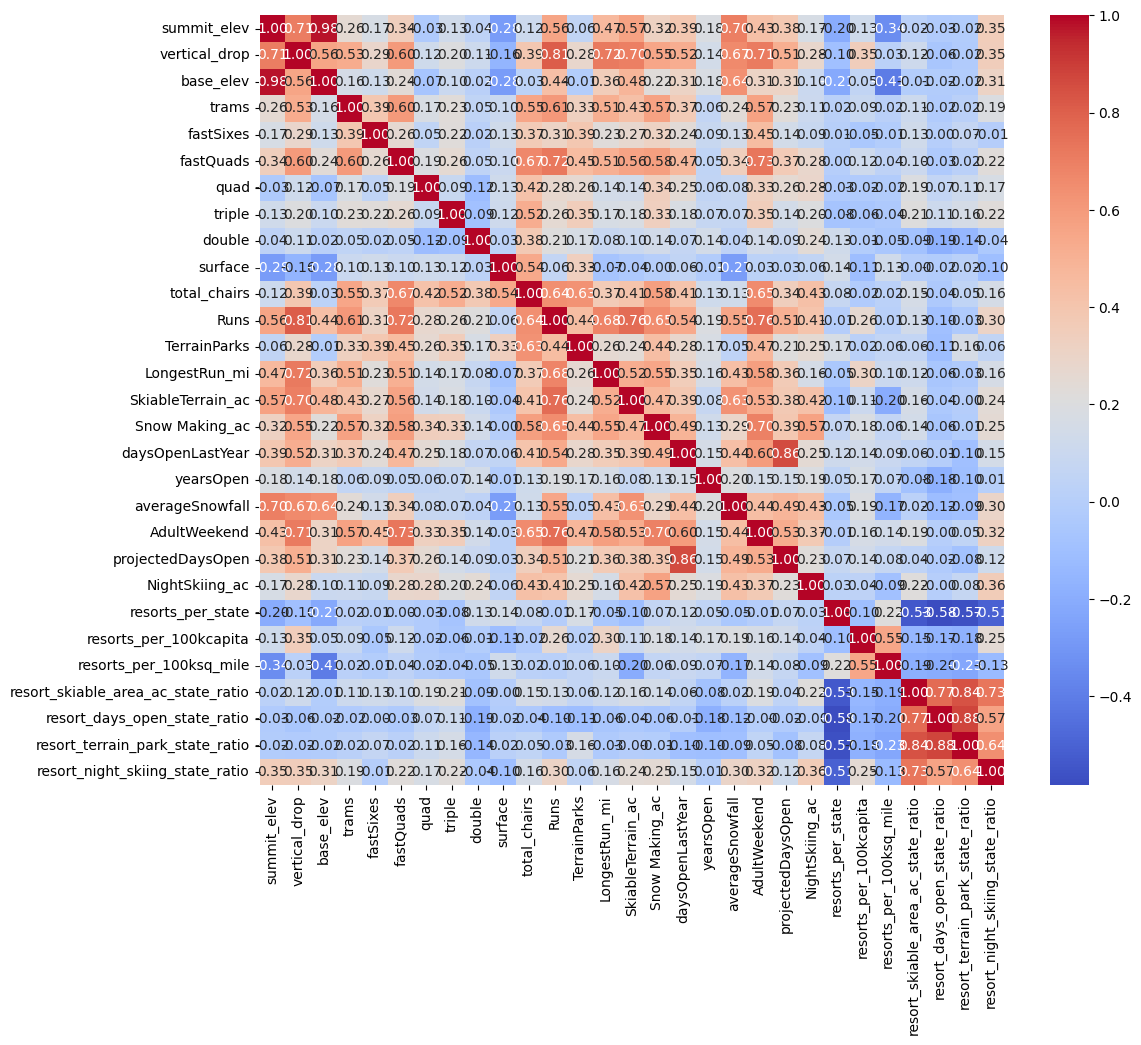

In [122]:
#Show a seaborn heatmap of correlations in ski_data

numeric_columns = ski_data.select_dtypes(include = [np.number])
correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f');

From the resort–state feature heatmap, I see:

Collinearity: Summit and base elevation are highly correlated. My new ratio features are (as expected) negatively correlated with the raw count of resorts in a state—more resorts → each resort’s “share” of state totals falls. There’s a positive link between night-skiing area ratio and resorts per capita: denser resort markets tend to offer more night skiing.

What tracks price `(AdultWeekend)`:

`fastQuads`, `Runs`, and `SnowMaking_ac` are strong correlates—guaranteed snow (snowmaking) appears more valuable than sheer terrain size.

Among engineered features, resort_night_skiing_state_ratio is the most price-linked → capturing a larger share of a state’s night-ski capacity supports higher pricing.

total_chairs also correlates well `(capacity proxy)`; vertical_drop is a clear premium driver.

Modeling implications

Control multicollinearity (`regularization`, `PCA`, or feature selection).

Prioritize snowmaking area, lift capacity, runs, vertical drop, and night-ski share over raw total terrain.

Validate effects with partial correlations / regularized regression to separate overlapping signals.


#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

Correlations were a good first sweep, but they can hide non-linear or segmented patterns. I’ll now plot AdultWeekend price vs. each numeric feature to see the shape of relationships.

Plan

* Build a grid of scatters: vertical_drop, runs, snowMaking_ac, fastQuads, total_chairs, resort_night_skiing_state_ratio, and other engineered shares.

* Use transparency (alpha) and jitter to handle overlap; add a LOWESS (or spline) trend with 95% CI and report Spearman ρ on each panel.

* Try log/√ transforms where skewed; flag outliers and potential thresholds/plateaus.

* Optional facets by region or resort size to check interaction effects.

In [123]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [124]:
#build a list of features from the columns of `ski_data` that
#are _not_ any of 'Name', 'Region', 'state', or 'AdultWeekend'
features = [x for x in ski_data.columns if x not in ['Name', 'Region', 'state', 'AdultWeekend']]

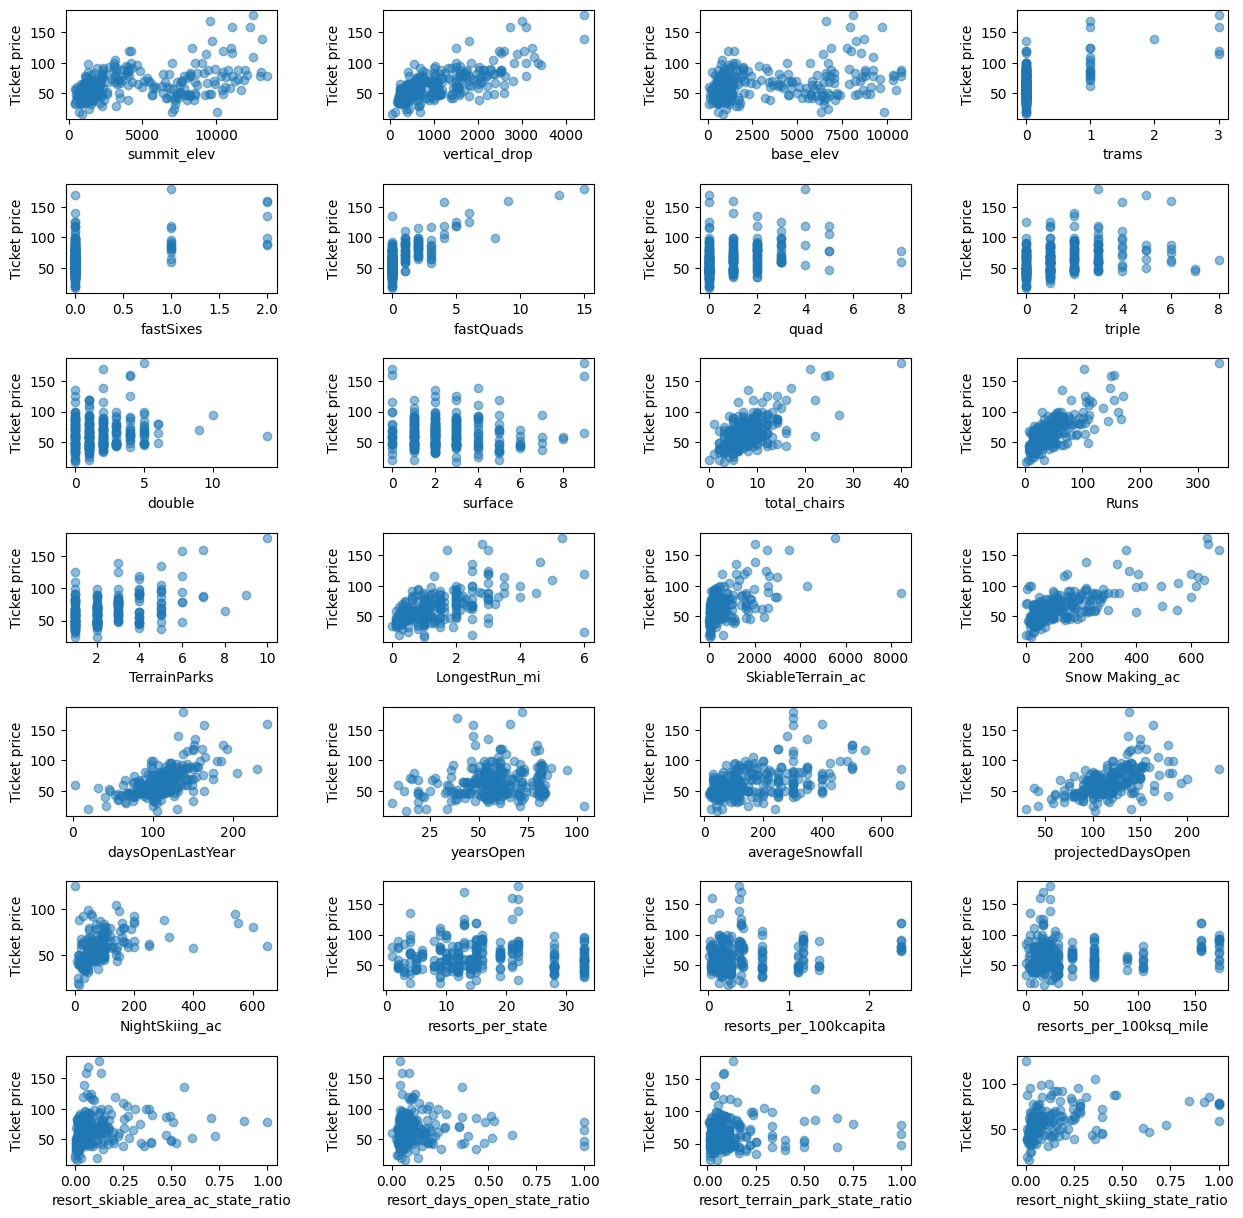

In [125]:
scatterplots(features, ncol=4, figsize=(15, 15))

From the scatterplots, I can see what the heatmap was hinting at:

* `vertical_drop` shows a clear, strong positive slope—top pricing driver.

* `fastQuads` is highly informative;

* `Runs` and `total_chairs` carry very similar signal (capacity), so I’ll treat them as partially redundant.

The interesting one is `resorts_per_100kcapita`: it isn’t linear. At low values, prices are highly variable (some very high—possible scarcity/monopoly effects). Then prices dip slightly and rise as resorts-per-capita increases—consistent with popular, high-demand markets supporting higher prices.

Model takeaways

* Keep vertical_drop and `fastQuads` as key predictors.

* Handle Runs/total_chairs with regularization or pick one to reduce redundancy.

* Model `resorts_per_100kcapita` with a non-linear term (`spline/quadratic`) and test for a U-shape; validate via partial dependence.


To capture how efficiently a resort moves guests around, I’m creating lift-to-run capacity ratios. I already have counts for chairs (incl. fastQuads) and the number of runs, but not their ratios—these should proxy crowding and time-to-next-slope.

In [126]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

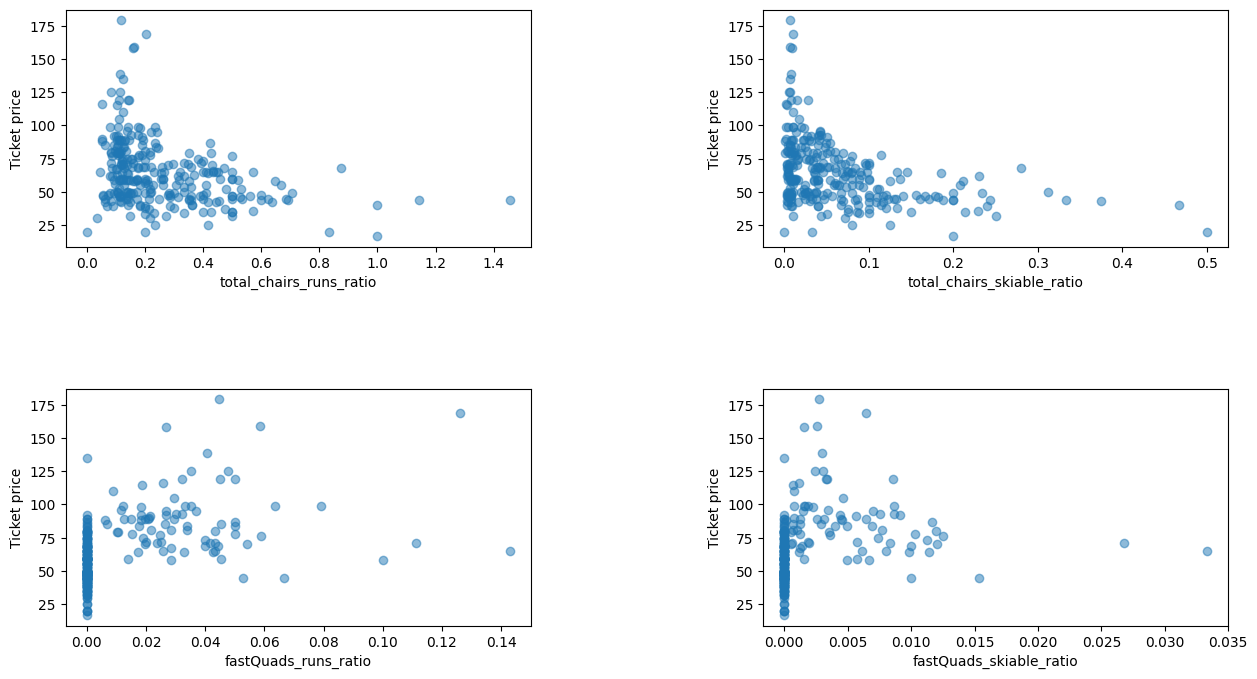

In [127]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

The new “transportability” ratios behave counterintuitively: as chairs per run rises, ticket price drops and stays low. A plausible story is exclusive vs. mass-market positioning—low-capacity resorts can charge more per visitor, while high-capacity resorts keep prices lower to drive volume. What I’m missing is a direct demand/visitation variable. I also see that having zero fast quads caps price, but a small number of fast quads on large terrain can lift price.

## 3.6 Summary<a id='3.6_Summary'></a>

**Q: 1** Write a summary of the exploratory data analysis above. What numerical or categorical features were in the data? Was there any pattern suggested of a relationship between state and ticket price? What did this lead us to decide regarding which features to use in subsequent modeling? What aspects of the data (e.g. relationships between features) should you remain wary of when you come to perform feature selection for modeling? Two key points that must be addressed are the choice of target feature for your modelling and how, if at all, you're going to handle the states labels in the data.

**A: 1** My answer

In [128]:
ski_data.head().T

,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1
quad,2,0,0,2,2


In [129]:
# Save the data 

datapath = '../data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)

A file already exists with this name.



Do you want to overwrite? (Y/N) Y


Writing file.  "../data\ski_data_step3_features.csv"
